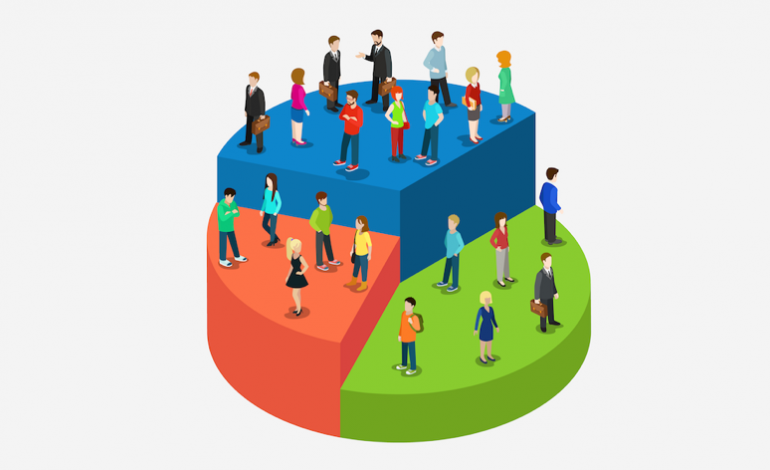

1. **IMPORTING LIBRARIES AND DATASET**
2. **EXPLORATORY DATA ANALYSIS**
3. **DATA VISUALIZATIONS**
4. **K-MEANS CLUSTERING**
5. **HIERARCHICAL CLUSTERING**
6. **DB-SCAN CLUSTERING**

### 1. IMPORTING LIBRARIES AND DATASET ###

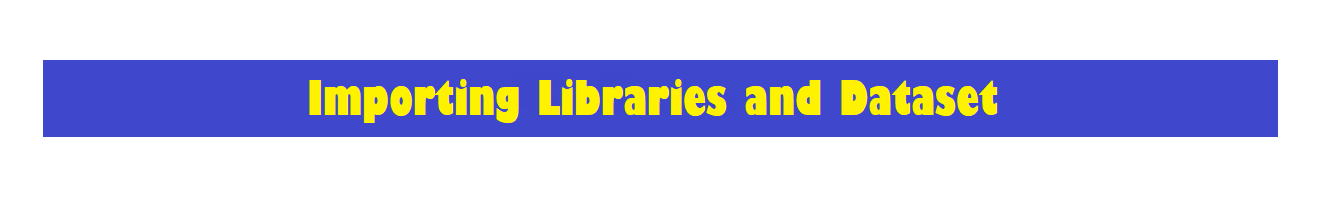

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN 
from sklearn.cluster import MeanShift, estimate_bandwidth
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix
import os
import warnings
warnings.filterwarnings('ignore')
py.offline.init_notebook_mode(connected = True)
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

### 2. EXPLORATORY DATA ANALYSIS ###

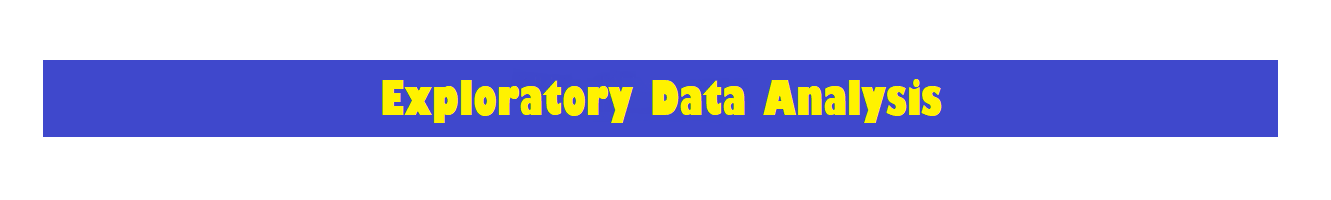

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**We have 5 features. The CustomerID feature is not needed.**

In [4]:
df = df.drop('CustomerID',axis = 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [6]:
df.shape

(200, 4)

In [7]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [8]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**There is no missing data in any column**

<AxesSubplot:>

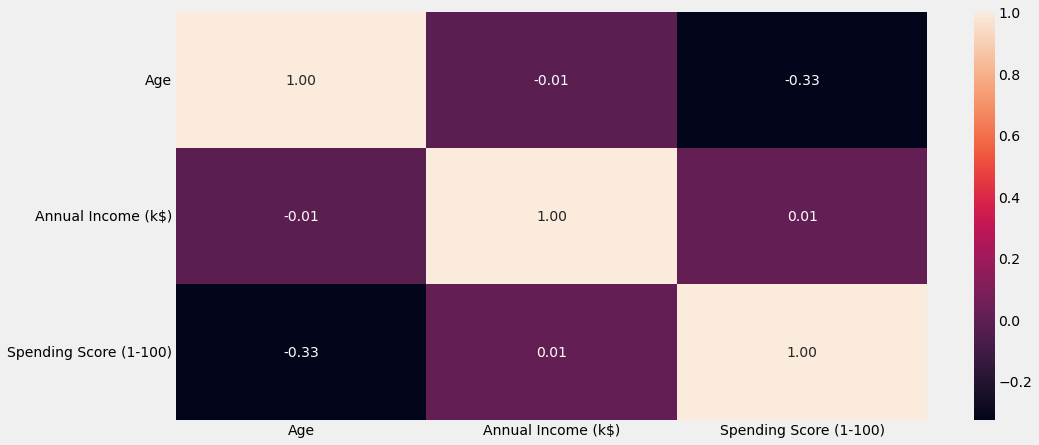

In [9]:
f,ax = plt.subplots(figsize=(15, 7))
sns.heatmap(df.corr(), annot = True, fmt= '.2f')

### 3. DATA VISUALIZATIONS ###

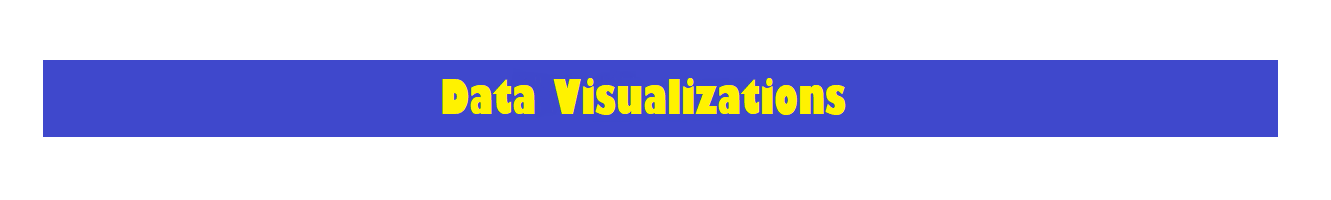

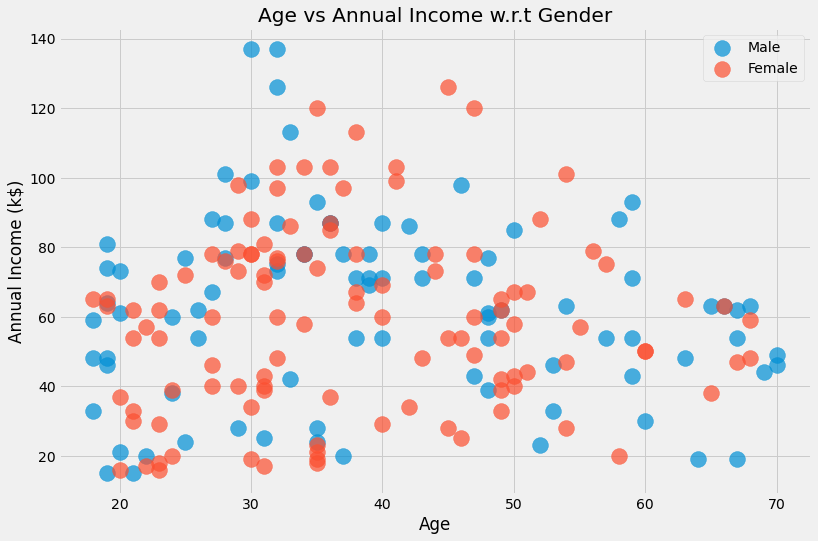

In [10]:
plt.figure(1 , figsize = (12 , 8))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 250 , alpha = 0.7 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

**By this plot we can get insight about the relation between Age and Annual Income features. It seems like customers between 35 and 45 years old have the highest annual income. The plot also shows women have more income than men.**

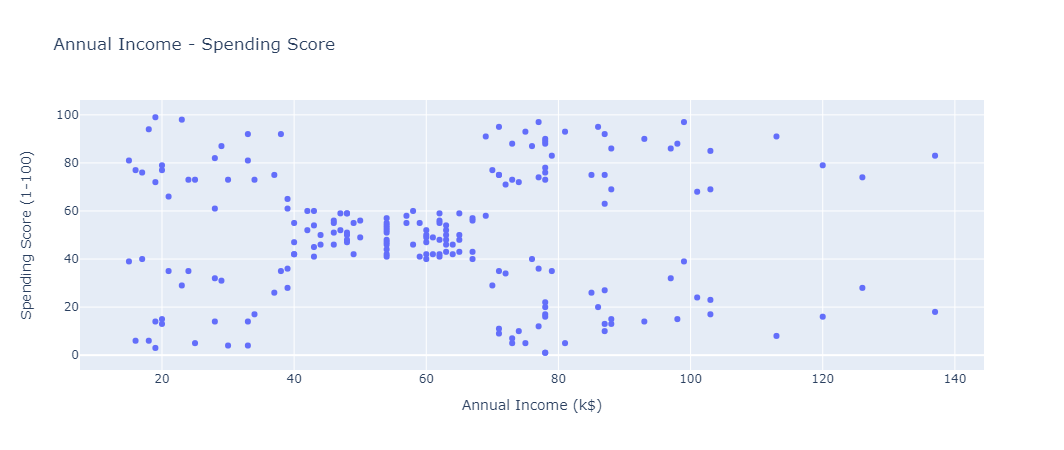

In [11]:
px.scatter(data_frame = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)',
          title = 'Annual Income - Spending Score')

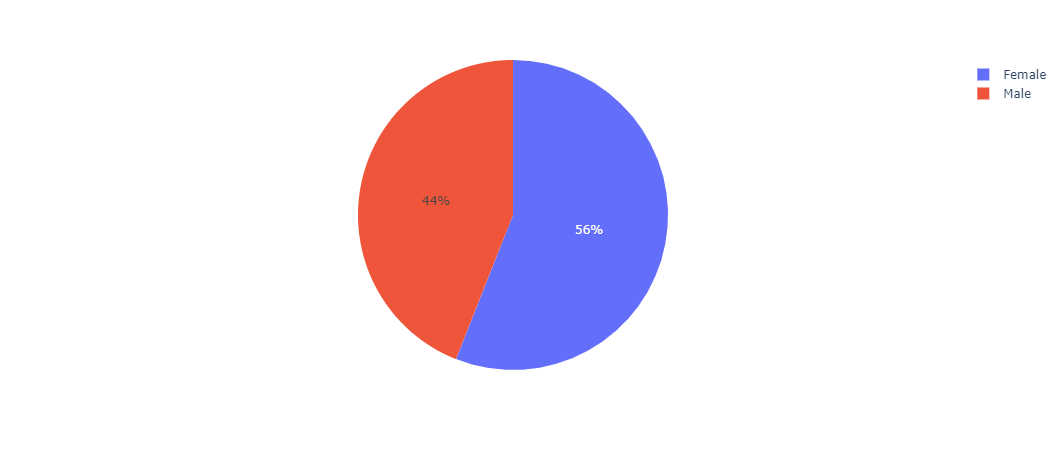

In [12]:
fig = px.pie(df, names='Gender')
fig.show()

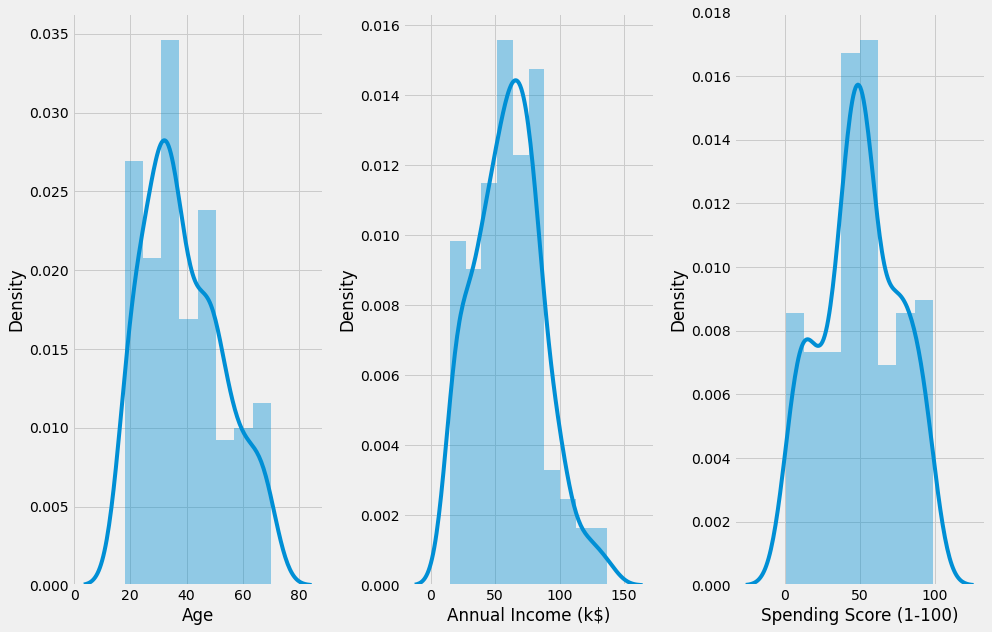

In [13]:
plt.figure(figsize = (14, 9))
plotnumber = 1

for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    if plotnumber <= 3:
        ax = plt.subplot(1, 3, plotnumber)
        sns.distplot(df[col])
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

### 4. K-MEANS CLUSTERING ###

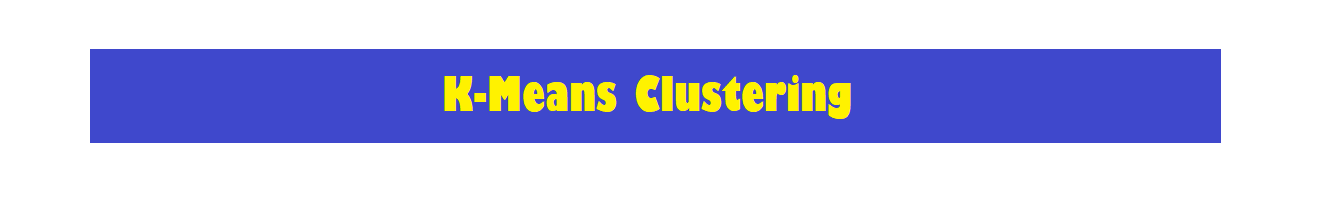

**K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.**

**Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes.**

**A cluster refers to a collection of data points aggregated together because of certain similarities.**

**You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.**

**Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.**

**In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.**

**The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.**

[For more knowledge about K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Text(0, 0.5, 'Inertia')

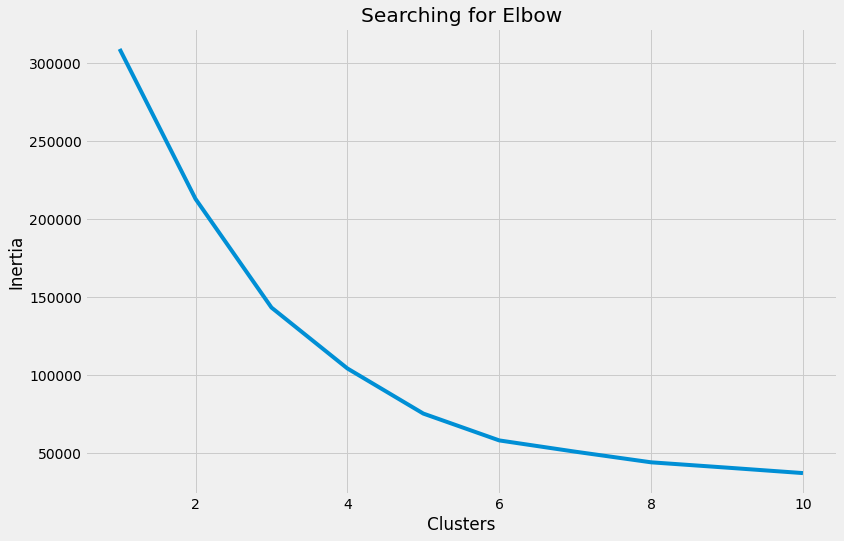

In [14]:
X = df.drop('Gender', axis=1)
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

**Elbow graph shows 5 cluster is optimum**

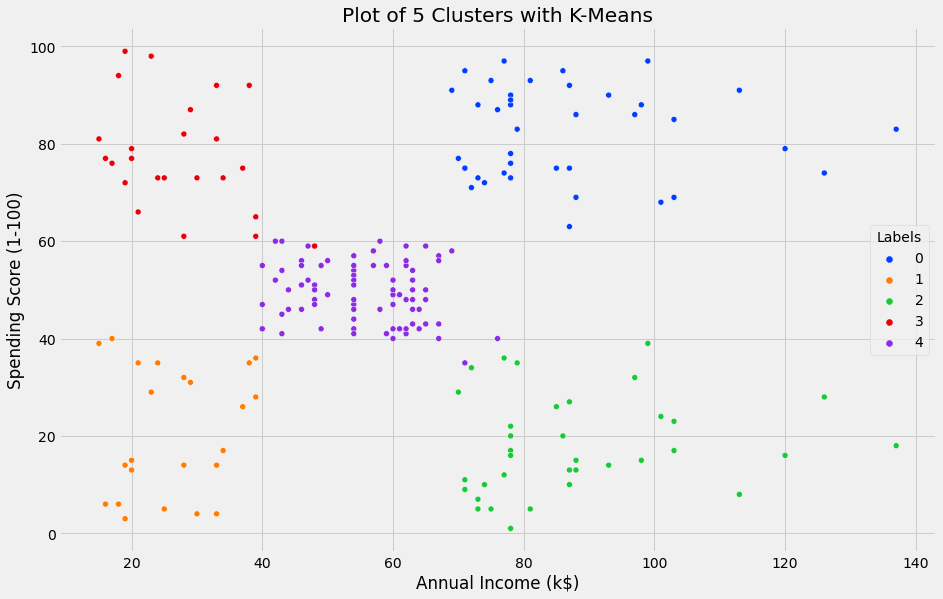

In [15]:
k = 5
clusters = KMeans(n_clusters = k).fit(X)
X['Labels'] = clusters.labels_
plt.figure(figsize=(14, 9))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('bright', 5))
plt.title('Plot of 5 Clusters with K-Means')
plt.show()

* **Cluster with Label 0 displays (blue) --> Those who have high annual income but high spending score**
* **Cluster with Label 1 displays (orange) --> Those who have low annual income and low spending score**
* **Cluster with Label 2 displays (green) --> Those who have high annual income and low spending score**
* **Cluster with Label 3 displays (red) --> Those who have love annual income but high spending score**
* **Cluster with Label 4 displays (purple) --> Those who have mid-level annual income and mid-level spending score**

### 5. HIERARCHICAL CLUSTERING ###

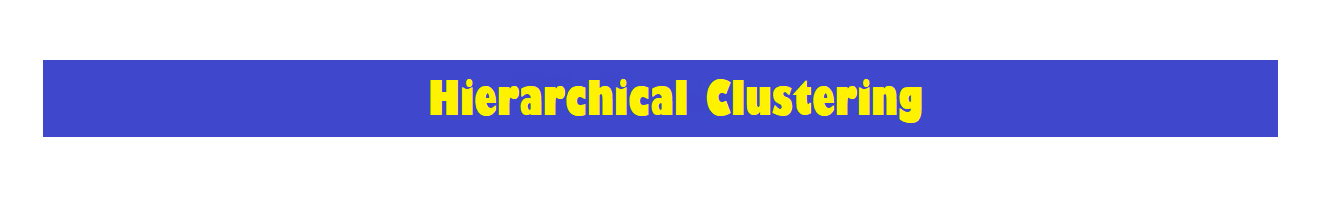

**Hierarchical clustering Technique:**

**Hierarchical clustering is one of the popular and easy to understand clustering technique. This clustering technique is divided into two types:**

**Agglomerative
Divisive
Click Here To Claim Yout Complimentary McDonald’s Gift Card**

**Agglomerative Hierarchical clustering Technique: In this technique, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed.**

**The basic algorithm of Agglomerative is straight forward.**

**Compute the proximity matrix
Let each data point be a cluster
Repeat: Merge the two closest clusters and update the proximity matrix
Until only a single cluster remains
Key operation is the computation of the proximity of two clusters**

**To understand better let’s see a pictorial representation of the Agglomerative Hierarchical clustering Technique. Lets say we have six data points {A,B,C,D,E,F}.**

1. **Step- 1: In the initial step, we calculate the proximity of individual points and consider all the six data points as individual clusters as shown in the image below.**
2. **Step- 2: In step two, similar clusters are merged together and formed as a single cluster. Let’s consider B,C, and D,E are similar clusters that are merged in step two. Now, we’re left with four clusters which are A, BC, DE, F.**
3. **Step- 3: We again calculate the proximity of new clusters and merge the similar clusters to form new clusters A, BC, DEF.**
4. **Step- 4: Calculate the proximity of the new clusters. The clusters DEF and BC are similar and merged together to form a new cluster. We’re now left with two clusters A, BCDEF.**
5. **Step- 5: Finally, all the clusters are merged together and form a single cluster.**

**The Hierarchical clustering Technique can be visualized using a Dendrogram.**

**A Dendrogram is a tree-like diagram that records the sequences of merges or splits.**

[For more knowledge about Hierarchical Clustering](https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec)

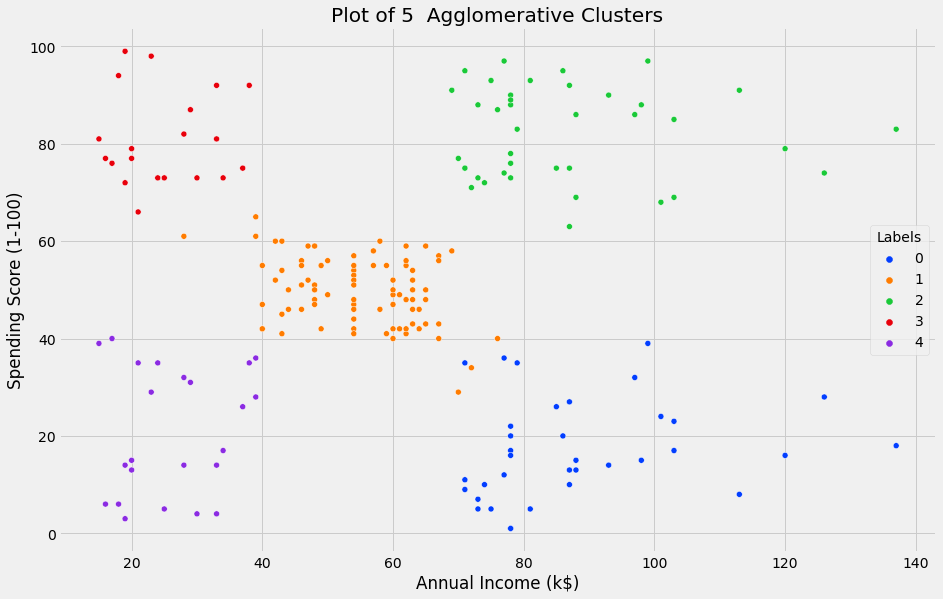

In [16]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix
from sklearn.cluster import DBSCAN

agglomerative_clusters = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

X['Labels'] = agglomerative_clusters.labels_
plt.figure(figsize=(14, 9))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('bright', 5))
plt.title('Plot of 5  Agglomerative Clusters')
plt.show()

* **Cluster with Label 0 displays (blue) --> Those who have high annual income but low spending score**
* **Cluster with Label 1 displays (orange) --> Those who have mid-level annual income and mid-level spending score**
* **Cluster with Label 2 displays (green) --> Those who have high annual income and high spending score**
* **Cluster with Label 3 displays (red) --> Those who have low annual income but high spending score**
* **Cluster with Label 4 displays (purple) --> Those who have low annual income and low spending score**

In [17]:
dist = distance_matrix(X, X)
print(dist)
Z = hierarchy.linkage(dist, 'complete')

[[  0.          42.05948169  33.03028913 ... 117.12813496 124.53915047
  130.17296186]
 [ 42.05948169   0.          75.01999733 ... 111.76761606 137.77880824
  122.35195135]
 [ 33.03028913  75.01999733   0.         ... 129.89226305 122.24974438
  143.78456106]
 ...
 [117.12813496 111.76761606 129.89226305 ...   0.          57.10516614
   14.35270009]
 [124.53915047 137.77880824 122.24974438 ...  57.10516614   0.
   65.06150936]
 [130.17296186 122.35195135 143.78456106 ...  14.35270009  65.06150936
    0.        ]]


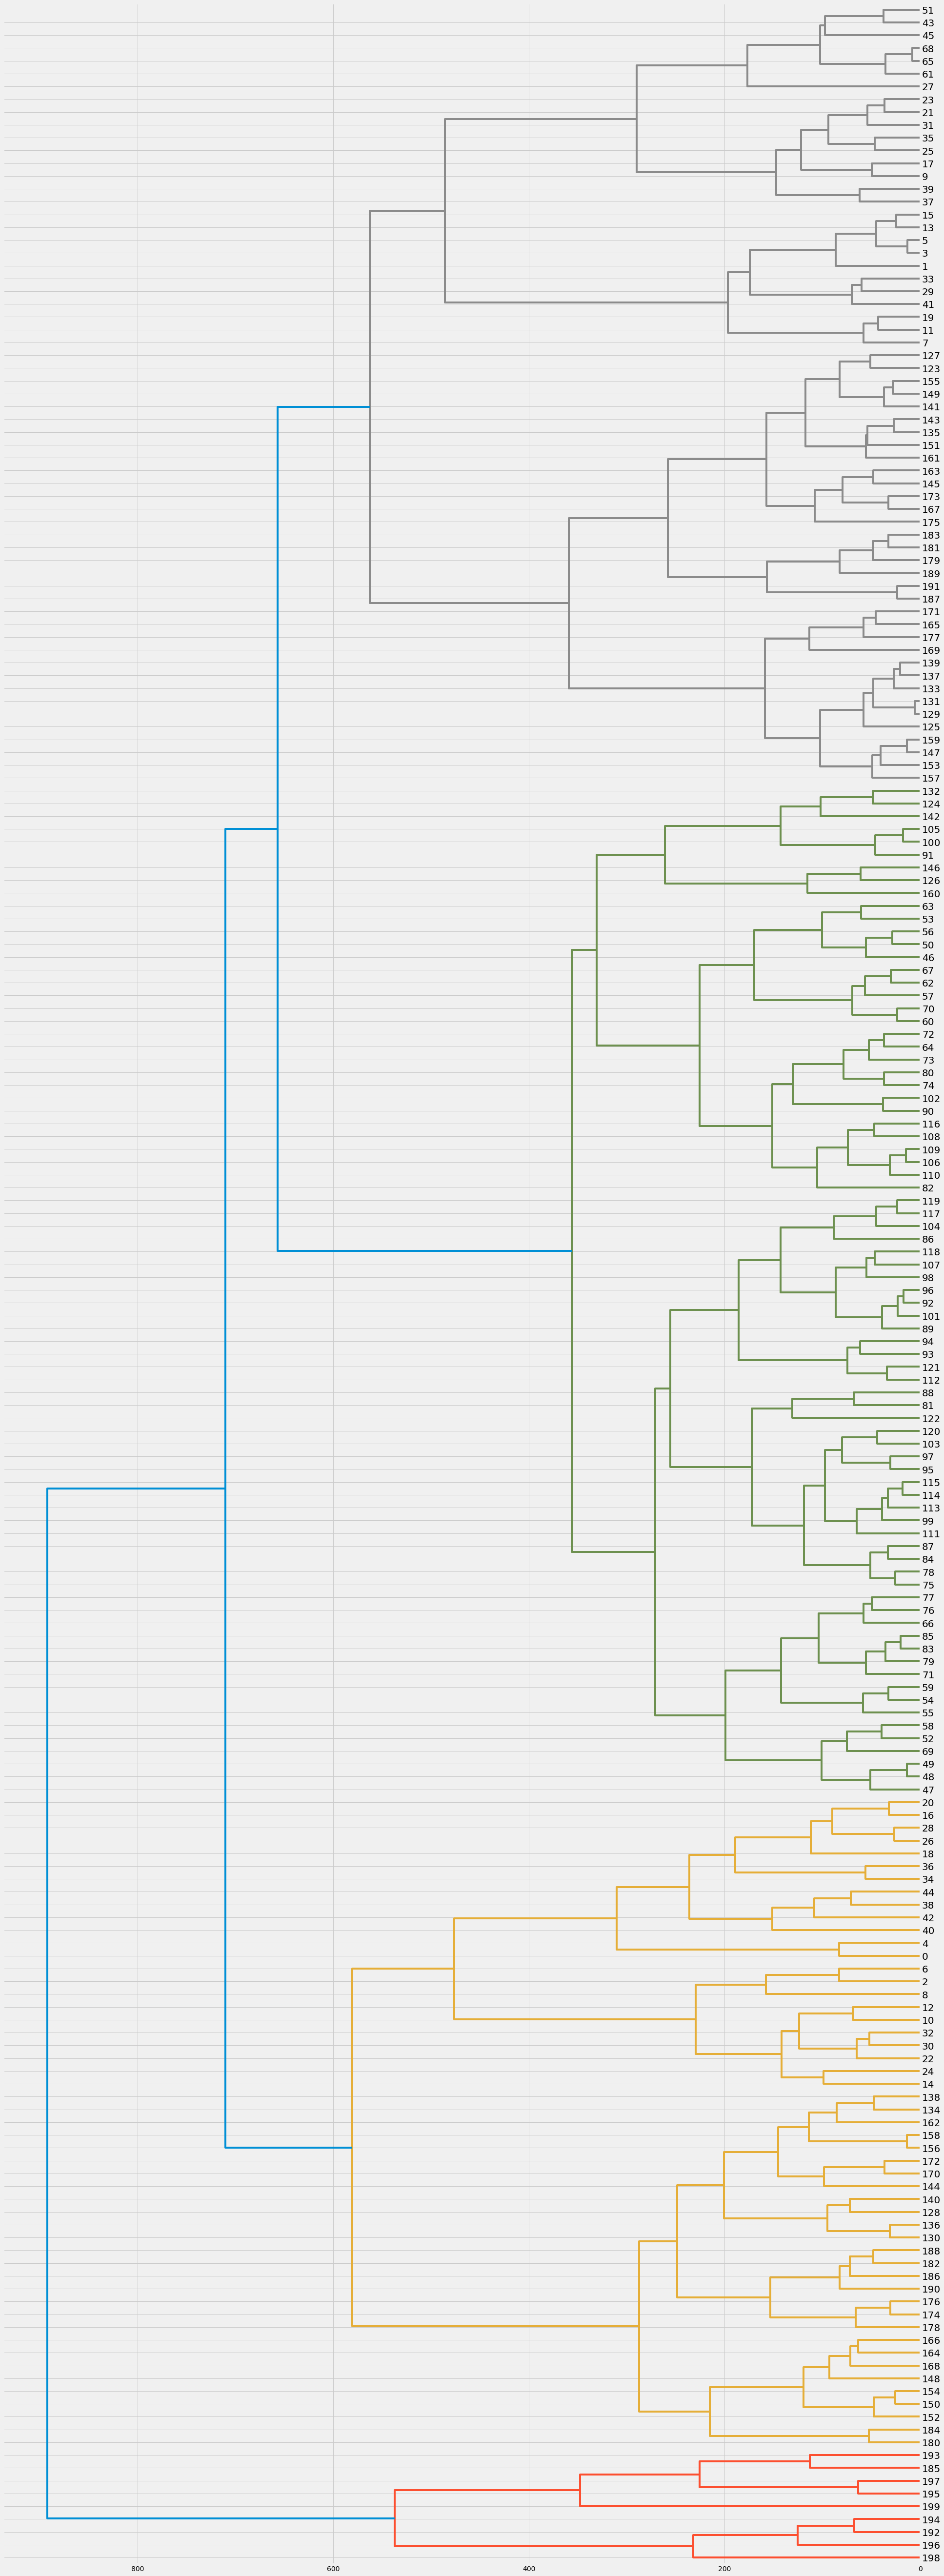

In [18]:
plt.figure(figsize=(30, 90))
cluster_dendrograms = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=20, orientation='left')

### 6. DB-SCAN CLUSTERING ###

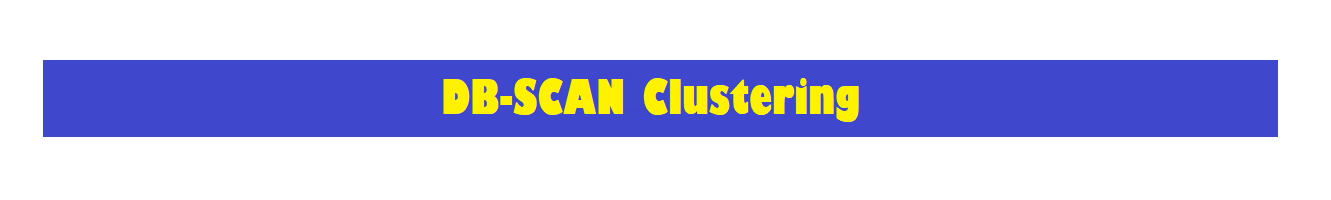

**DBSCAN stands for density-based spatial clustering of applications with noise. It is able to find arbitrary shaped clusters and clusters with noise (i.e. outliers).**

**The main idea behind DBSCAN is that a point belongs to a cluster if it is close to many points from that cluster.**

**There are two key parameters of DBSCAN:**

**eps: The distance that specifies the neighborhoods. Two points are considered to be neighbors if the distance between them are less than or equal to eps.
minPts: Minimum number of data points to define a cluster.
Based on these two parameters, points are classified as core point, border point, or outlier:**

**Core point: A point is a core point if there are at least minPts number of points (including the point itself) in its surrounding area with radius eps.
Border point: A point is a border point if it is reachable from a core point and there are less than minPts number of points within its surrounding area.
Outlier: A point is an outlier if it is not a core point and not reachable from any core points.**

**Now we can talk about how the algoritm works. It is actually quite simple:**

**minPts and eps are determined.
A starting point is selected at random at it’s neighborhood area is determined using radius eps. If there are at least minPts number of points in the neighborhood, the point is marked as core point and a cluster formation starts. If not, the point is marked as noise. Once a cluster formation starts (let’s say cluster A), all the points within the neighborhood of initial point become a part of cluster A. If these new points are also core points, the points that are in the neighborhood of them are also added to cluster A.
Note: A point that is marked as noise may be revisited and be part of a cluster.**

**Next step is to randomly choose another point among the points that have not been visited in the previous steps. Then same procedure applies.
This process is finished when all points are visited.
The distance between points is determined using a distance measurement method as in k-means algorithm. The most commonly used method is euclidean distance.**

**By applying these steps, DBSCAN algorithm is able to find high density regions and separate them from low density regions.**

**A cluster includes core points that are neighbors (i.e. reachable from one another) and all the border points of these core points. The required condition to form a cluster is to have at least one core point. Although very unlikely, we may have a cluster with only one core point and its border points.**

[For more knowledge about DB SCAN Clustering](https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556)

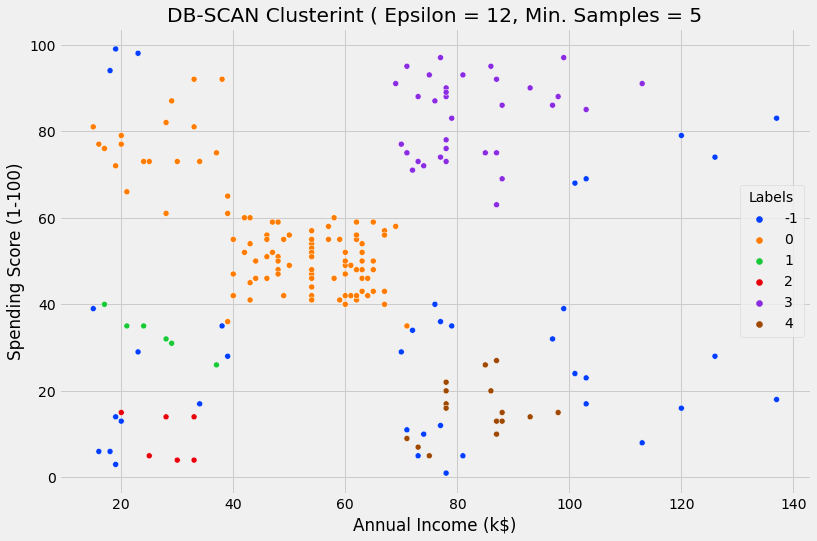

In [19]:
db_clusters = DBSCAN(eps=12, min_samples=5).fit(X)

X['Labels'] = db_clusters.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('bright', np.unique(db_clusters.labels_).shape[0]))
plt.title('DB-SCAN Clusterint ( Epsilon = 12, Min. Samples = 5')
plt.show()

* **Cluster with Label -1 displays (blue) --> Outliers**
* **Cluster with Label 0 displays (orange) --> Those who have mid-level annual income but mid-level spending score**
* **Cluster with Label 1 displays (green) --> Those who have low annual income and low spending score(more than red)**
* **Cluster with Label 2 displays (red) --> Those who have low annual income and low spending score**
* **Cluster with Label 3 displays (purple) --> Those who have high annual income and high spending score**
* **Cluster with Label 4 displays (brown) --> Those who have high annual income but low spending score**

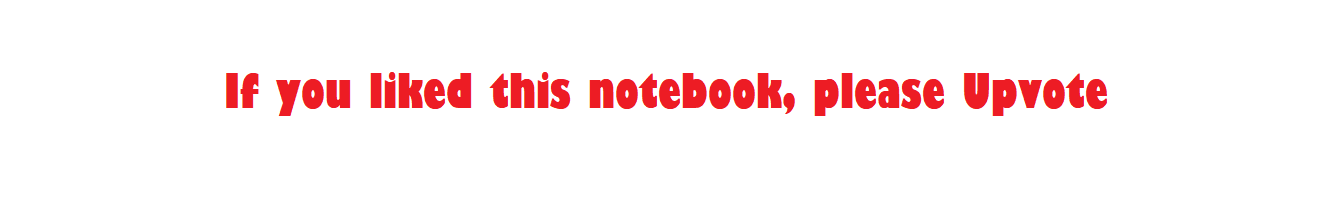